<a href="https://colab.research.google.com/github/Pengyu-gis/MyDeepLearing/blob/main/ImageSegmentation/segformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [2]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import requests

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")

/usr/local/lib/python3.9/dist-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/transformers/models/segformer/image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [3]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

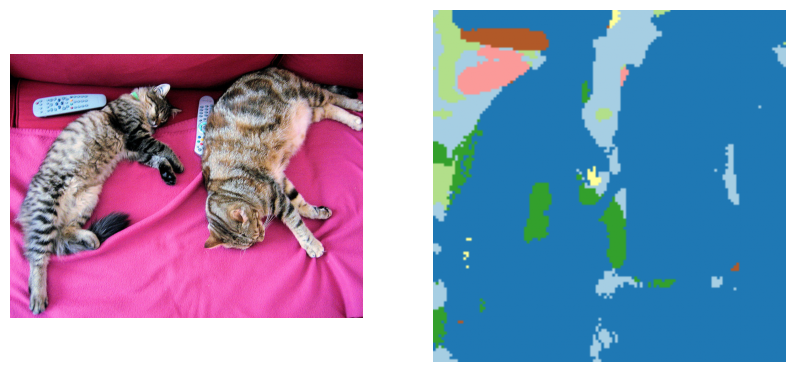

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms

# Define colormap
cmap = plt.get_cmap("Paired")

# Get predicted segmentation mask
mask = logits.argmax(dim=1).squeeze().detach().cpu().numpy()

# Apply colormap to segmentation mask
mask_color = cmap(mask / (mask.max() if mask.max() != 0 else 1))

# Convert PIL image to numpy array
image_np = np.array(image)

# Plot the original image and the segmentation mask
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image_np)
axs[0].axis("off")
axs[1].imshow(mask_color)
axs[1].axis("off")
plt.show()